# <font color='blood'> Polynomial - Linear Regression

<hr>


In this exercise, we attempt to apply polynomial regression on 4 datasets. Polynomial regression can be solved using linear regression methods as long as it stays linear towards its $W$ parameter. For example :
$\hat f_i = W_0 + W_1 \sin(x_i) + W_2 \cos(x_i)$ can be solved using linear methods. That is instead of using non-linear methods; We assume $x_i$ , which was previously $\in \mathbb{R}$, to be $\in \mathbb{R}^3$. To simplify our calculation, $\Phi$ is defined which belongs to $\mathbb{R}^4$.

 

Using $||.||_2$  in order to calculate the $W$ vector for each model comes with pros and cons. $||.||_2$ benefits are that it is easy to optimize using matrix decomposition methods (SVD). But as long as it is  squaring ($\Box^2$) The difference between $y$ and $\hat y$, it is too sensitive to **noise** and **outliers**.

    

We attempt to apply polynomial regression on 4 datasets with degree ($M = 1\dots9$)  and obtain train models. Using these models, we calculate RMSE and MAE for both train and test as well as the condition number of matrix $\Phi^T\Phi$ and $\hat y$. Then, Record each result in a specific dataframe called info_df. Using *info_df*, we can observe useful information about the relation of $M$, RMSE, MAE ,and condition number.

    

<hr> 
    
Everything required for this exercise is available at : 
   
 
    
***GitHub*** :
    
    
***GoogleDrive*** : <a href = "https://drive.google.com/drive/folders/1niMVv-MMUy9xqnNTpx_zUXjTB_tFAqQ5?usp=sharing" > Q-ML-series2 google drive </a>
    
    

# <font color='blood'> Import libraries
<hr> 

First, it is a necessity to import these libraries as they are later used by our code.
    
$\bullet$ numpy is used for our mathematical purposes
    
$\bullet$ pandas to read the data
 
$\bullet$ matplotlib to visualize and draw the plots

$\bullet$ sklearn for linear regression and polynomialFeatures to construct polynomial regression



In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# <font color='blood'> Import data
<hr> 

   
Data primary path is in a directory called  "**Data** " which is located in the main directory.
We use pandas to read these csv files, dataset1 to dataset5 which are train data whereas dataset3 is 
the test data that will be used to evaluate our models constructed by each dataset.

    
    

If for any reason the data is not available in the *Data* directory, Use the data link which should be available to download and place them at the appropriate location. Just choose the proper *path* according to the location you use to place your datasets so the other lines of the code can function properly

    
    
all datasets link : <a href = "https://drive.google.com/drive/folders/1niMVv-MMUy9xqnNTpx_zUXjTB_tFAqQ5?usp=sharing" > Data directory</a>
    
$\bullet$ dataset1 consists of 10 random numbers of function $ y = \sin(2\pi x)$ between [0,1]
    
$\bullet$ dataset2 is dataset1 with a little bit of noise
    
$\bullet$ dataset3 as mentioned before is our test data with 50 samples
    
$\bullet$ dataset4 is similar to dataset2 but with two outliers
    
$\bullet$ dataset5 is similar to dataset2 but with more samples
    
We save all of these datasets in a list called *datasets*.

In [29]:
path = '../Data/'

dataset1 = pd.read_csv(path+'data1.csv')
dataset2 = pd.read_csv(path+'data2.csv')
dataset3 = pd.read_csv(path+'data3.csv')
dataset4 = pd.read_csv(path+'data4.csv')
dataset5 = pd.read_csv(path+'data5.csv')

datasets = {1 : dataset1, 2:dataset2, 3:dataset3, 4:dataset4, 5:dataset5}

# <font color='blood'> Prepare Data for Visualization
<hr>
    

Since we are going to use matplotlib to visualize, one of the most annoying problems is that it draws the line between point in the same order it is given to. What it means is that if for example you wish to draw a line between x = [1,3,2] and y = [1,2,3], matplotlib first connects (1,1) to (3,2) and then (3,2) to (2,3). But in reality when we (humans) want to draw this line we take care of sorting by default that means we usually draw lines in the ascending order of X in XY-plane. So if the points are (1,1), (3,2), and (2,3) ; We first connect (1,1) to (2,3) and then (2,3) to (3,2).
  
    
bellow is the example : 

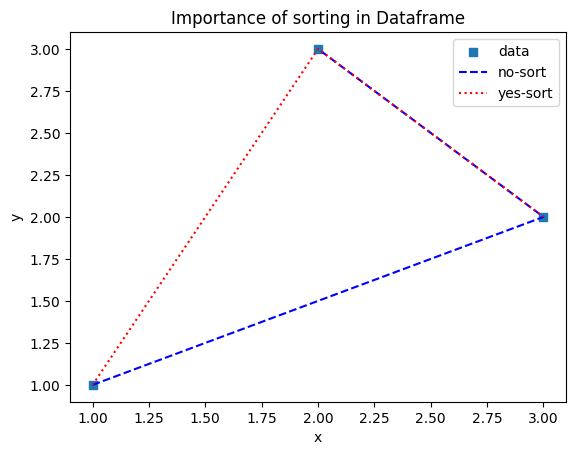

In [30]:
plt.scatter([1,3,2], [1,2,3],marker = 's', label = 'data')
plt.plot([1,3,2], [1,2,3],'b--', label = 'no-sort')
plt.plot([1,2,3], [1,3,2],'r:', label = 'yes-sort')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Importance of sorting in Dataframe')
plt.legend(loc = 'best')
plt.show()

## <font color='blood'> Problem in Visualizing the datasets

    

If for example we don't factor the sorting problem, Once we decided to draw a simple line between **x** and **t** values, we observe this monstrosity. Remember that all these point are supposed to be of $\sin$ function so the line between them should at least suggest $\sin$ function and not something else.


    
This is an example of the problem in dataset1 which is not sorted

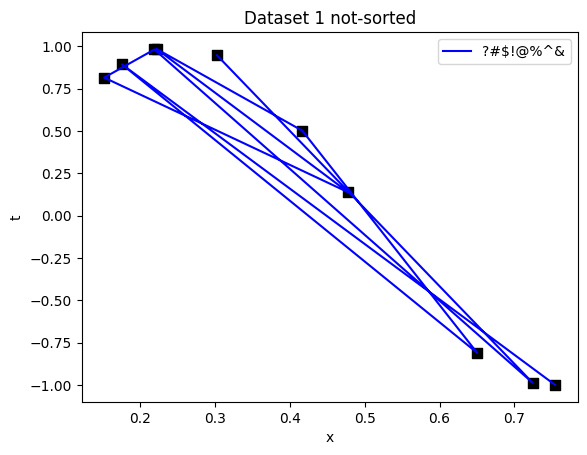

In [31]:
plt.scatter(dataset1['x'], dataset1['t'], s = 50, marker = 's', color = 'black')
plt.plot(dataset1['x'], dataset1['t'],'b-', label = '?#$!@%^&')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Dataset 1 not-sorted')
plt.legend(loc = 'best')
plt.show()

## <font color='blood'> Solution to the problem

    

The problem occurs because dataset1 was not sorted. That is matplotlib first draws between $(x_1,t_1)$ and $(x_2,t_2)$, but in reality even though $(x_1, t_1)$ belongs to $\sin$, there might be other points like $(x_j,t_j)$ where they do also belong to $\sin$ and $j > 1$ and $x_j \leq x_1$. This causes the problem in visualizing the data.

    

Once we underestand the problem, it'll be easy to solve since it is just a matter of sorting the dataset based on x values. To sort a dataframe (dataset in pandas) we use *.sort_values* by *x* column.

    
The result for dataset1 will is presented.

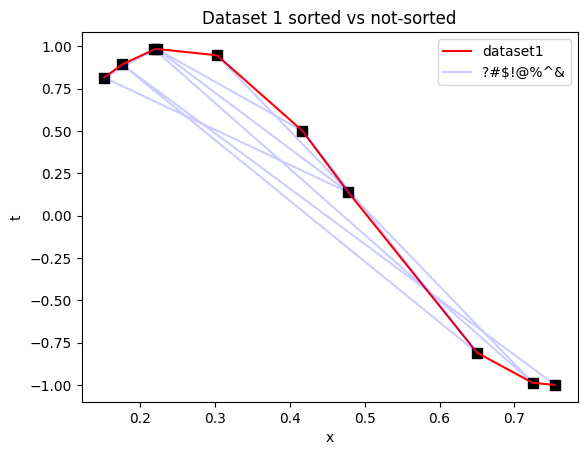

In [32]:
dataset_sorted = dataset1.sort_values(by = 'x')
plt.scatter(dataset_sorted['x'], dataset_sorted['t'], s = 50, marker = 's', color = 'black')
plt.plot(dataset_sorted['x'], dataset_sorted['t'],'r-', label = 'dataset1')
plt.plot(dataset1['x'], dataset1['t'],'b-', label = '?#$!@%^&',alpha = 0.2)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Dataset 1 sorted vs not-sorted')
plt.legend(loc = 'best')
plt.show()

## <font color='blood'> Sort every dataset
    
Sort every dataset by its *x* column values so that the visualization is smoother and better.


In [33]:
for index in range(1,6):
    datasets[index] = datasets[index].sort_values(by = 'x')

# <font color='blood'> Data Visualization
<hr>
    

Visualizing every dataset given to us.

    

First we draw the actual/real/exact function which is $\sin(2\pi x)$. To draw this function, we create an array of numbers in the range [0,1]; Hence we use *np.arange(start, stop, step)*. Then we calculate y based on $\sin(2\pi x)$ using *np.sin()*.

    

Each dataset contains samples from this function. X value is given to us ,then by some means they calculated the y (or t) value which is **supposed to be** $\sin(2\pi x)$. Since we can have error in our calculation, it is not guaranteed that our result will be on the actual function. Our object is to estimate this actual function ($\sin(2\pi x)$) using data which can contain noise, outliers, etc .


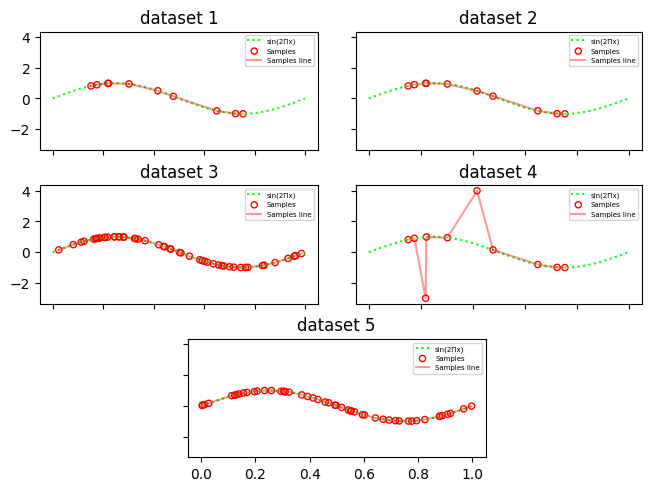

In [120]:
x = np.arange(0,1+0.01,0.01)
y = np.sin(2*np.pi*x)

fig = plt.figure(constrained_layout=True)
axd = fig.subplot_mosaic(
    """
    AAAABBBB
    AAAABBBB
    CCCCDDDD
    CCCCDDDD
    ..EEEE..
    ..EEEE..
    """
    ,
    sharex = True,
    sharey = True
)

for dic,index in zip(['A', 'B', 'C', 'D', 'E'], range(1,6)):
    
    axd[dic].plot(x,y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
    x_dataset = datasets[index]['x'].values
    y_dataset = datasets[index]['t'].values
    axd[dic].scatter(x_dataset,y_dataset,s=20, facecolors='none', edgecolors='red', label = 'Samples')
    axd[dic].plot(x_dataset,y_dataset, color = 'red', linestyle = '-', label = 'Samples line' ,alpha = 0.4)
    axd[dic].set_title('dataset ' + str(index))
    axd[dic].legend(loc = 'upper right', prop = {'size': 5})

# <font color='blood'> Linear Regression (Polynomial)
<hr>    

    

Linear Regression is one of the supervised methods in Machine Learning and works with a number of already seen (train) 
$\{x_i,t_i\}$ data to create a linear model $\hat f$ which is an estimation of the real $f$ model ($\sin$). That is if $f(x_i) = t_i$, it creates $\hat f$ where $\hat f(x_i) \approx t_i $. Then we evaluate our model on a set of unseen data (test) to choose the best model for our use.

    

Therefore, The main goal in Linear Regression is to create a linear function between $(x,t)$ values which are already known to estimate the $(x^\prime,t^\prime)$ values where $t^\prime$ is unkown.

    
    
## <font color='blood'>Simple Linear Regression
    

Simple Linear Regression is form where our data contains of two columns and can be presented in a XY-plane. Usually the first column is the *x* variable and the second is the *target* variable. 


    
Simple Linear Regression creates a simple line between these values that is :
    
$\hat t_i = W_0 + W_1 x_i$


In other cases, $x$ can have multiple columns. for example the values of columns $x_1$ and $x_2$ effect $target$. These data cannot be presented in a XY-plane since they are 3D, so a XYZ-space is required. You can generalize this statement, that is if data is nD then a nD-space is required to present it.
 
    
    
Regardless of the shape of x (for example $x = (x_1,x_2)$), a linear function can be used to estimate $t$ using these values : 
$\hat t_i = W_0 + W_1 X_{i1} + W_2 X_{i2}$.

Since our datas are simple in this document, then there is no need to dig any further.
    
## <font color='blood'> Polynomial Regression
 
    
   
Sometimes our data cannot be estimated using a simple linear function, however if we move to higher degrees, we might get better results. Remember that according to our knowledge, Linear Regression can be **non-linear** toward **x** variable. which means as long as our function is linear according to **W**, we can solve it using linear methods.


A polynomial function of degree **M** is something similar to 
    
$\hat t_i = W_0 + W_1 x_i + W_2 x_i^2 + \dots + W_M x_i^M$

Why is it considered a linear ? because we can assume instead of $x$ being a 1-D, it is M-D (or (M+1)-D) and solve it assuming that.
    
Note : As long as W stays linear in our function, we can change X (using base functions $\Phi(x)$) and still solve it using linear methods.

    
## <font color='blood'> $\Phi(x)$ 

    
$\Phi(x)$ is what we call base function. it can be polynomial, Gaussian, Sigmoid, etc . In our case we are using polynomial that is $\Phi_j(x) = x^j$.
    

    
1. Recall simple linear regression, $\hat t_i = W_0 + W_1 x_i$ 

  - We can consider $W^T = [W_0 , W_1]$  and $\Phi_i(x)^T = [1 , x_i]$
    
    
Then it is obvious that $t_i = W^T\Phi_i(x)$ or $t_i = \Phi_i(x)^TW$  

2. If it is polynomial such as $\hat t_i = W_0 + W_1 x_i + W_2 x_i^2 + \dots + W_M x_i^M$ 

    - Consider  $W^T = [W_0 , W_1 , \dots , W_M]$  and $\Phi_i(x)^T = [1 , x_i , x_i^2 , \dots , x_i^M]$ 
    
Then similar to previous attempt, $t_i = W^T\Phi_i(x)$ or $t_i = \Phi_i(x)^T W$
   
    
   
$\hat y$ or estimated $y$ also mentioned as $\hat t$ is the result of regression model.
To better underestand this

    
    
consider having $N$ samples $(x_i,t_i)$  $i:1\dots N$.

Your data is $X^T = [x_1,x_2,\dots,x_N]$ and $Y^T = [t_1,t_2,\dots,t_N]$
    
your goal is $\hat f$ so that $\hat f(X)$ estimates $Y$.
    
In the previous section, we calculated every $t_i$ using $x_i$, that is $t_i = \Phi^T W$. To to the same for $i : 1\dots N$
    
Consider $\Phi^T (X) = [\Phi_1(X_1), \Phi_2(X_2), \dots , \Phi_N(X_N)]$

Where $\Phi^T_i(X_i) = [1 , X_i , X_i^2 , \dots, X_i^M]$ for polynomial degree $M$. 
    
Therefore $\hat Y = \Phi(X)W$ or $\hat Y = \Phi W$ (for simplification purposes)
    
In summary
    
  $$
  Y \approx \hat  Y = \Phi W \hspace{10mm}
  \Phi = \begin{bmatrix} 1,x_1, x_1^2, x_1^3, \dots , x_1^M\\1,x_2, x_2^2, x_2^3, \dots , x_1^M\\ \vdots \\1,x_i, x_i^2, x_i^3,   \dots , x_i^M\\ \vdots \\1,x_N, x_N^2, x_N^3, \dots , x_N^M \end{bmatrix}_{N \times (M+1)}
  W = \begin{bmatrix} W_0\\W_1\\ \vdots \\W_i\\ \vdots \\W_M \end{bmatrix}_{(M+1)\times 1}
  \hat Y = \begin{bmatrix} \hat t_1\\\hat t_2\\ \vdots \\\hat t_i\\ \vdots \\\hat t_N \end{bmatrix}_{N \times 1}
  Y = \begin{bmatrix} t_1\\t_2\\ \vdots \\t_i\\ \vdots \\t_N \end{bmatrix}_{N \times 1} 
  $$
    
    
    
## <font color='blood'> Loss function
    
    
The only parameter in our model is $W$. According to $W$, $\hat Y$ can be very close to $Y$ (or very far from $Y$). Hence we define loss function and perform optimization on these loss functions to choose the best $W$ possible for our model. 

    
    
- $\min\Sigma_{i=1}^{N} loss(\hat y , y) = \min_W\Sigma_{i=1}^{N} loss(\Phi W , y)  $
    
There are multiple types of loss function which have their own advantages and disadvantages. 
 
- L1-norm : $\min_W\Sigma_{i=1}^{N} loss(\Phi W , y) = \min_W\Sigma_{i=1}^{N} |\Phi W  -  y| = || \Phi W  -  y ||_1$ 
    
- L2-norm : $\min_W\Sigma_{i=1}^{N} loss(\Phi W , y) = \min_W\Sigma_{i=1}^{N} (\Phi W  -  y)^2 = || \Phi W  -  y ||_2^2$
    
It is common to get the mean of these errors (considering $N$ samples) :  $\times \frac{1}{N}$

    
In this document we are using L2-norm method. The advantages of using this method is that it is easy to diffrentiate and it supports matrix-related methods which speed up and simplify optimization. L1-norm doesnt support these. But it has it own disadvantages as well.
    
    
## <font color='blood'> Optimization
    
Based on matrix-related methods (SVD), The answer to the problem $\min_W ||\Phi W - y||_2^2$ is $(\Phi^T\Phi)^{-1}\Phi^T y$.
    

$(\Phi^T\Phi)^{-1}\Phi^T$ is considered Moore–Penrose inverse of $\Phi$ and is shown as $\Phi ^ \dagger$ therefore:
    
 $$W = (\Phi^T\Phi)^{-1}\Phi^T y  = \Phi^\dagger y$$
    

## <font color='blood'> Condition number

    
One of the problems with especially $\Phi^T\Phi$ is that if its condition number is ill, the result is very sensitive to noise, Which is a bad factor. If regression model doesn't perform well, this might be the reason.


# <font color='blood'> Train Models
<hr>

## <font color='blood'> PolynomialFeatures


To train and create our models first we require to define some functions. Using *PolynomialFeatures* in *sklearn*
we can create a polynomial of degree M.

    
To obtain our desired form of $\Phi$, we set include_bias to ***True***. So that the $\Phi$ has the form bellow :

$$ \Phi = \begin{bmatrix} 1,x_1, x_1^2, x_1^3, \dots , x_1^M\\1,x_2, x_2^2, x_2^3, \dots , x_1^M\\ \vdots \\1,x_i, x_i^2, x_i^3,   \dots , x_i^M\\ \vdots \\1,x_N, x_N^2, x_N^3, \dots , x_N^M \end{bmatrix}_{N \times (M+1)} $$

if  include_bias is set to ***False***, Then $\Phi$ has another form :

$$ \Phi = \begin{bmatrix} x_1, x_1^2, x_1^3, \dots , x_1^M\\x_2, x_2^2, x_2^3, \dots , x_1^M\\ \vdots \\x_i, x_i^2, x_i^3,   \dots , x_i^M\\ \vdots \\x_N, x_N^2, x_N^3, \dots , x_N^M \end{bmatrix}_{N \times (M)} $$


Therefore the question is which one is correct ? both are the same but the latter is no longer the $\Phi$ that can be used to calculate $W$ using $\Phi^\dagger y$. For better understanding, Check the next section.


In [35]:
degree = range(1,10)
polynomials = {}
for M in degree:
    polynomials[M] = PolynomialFeatures(degree = M, include_bias = True)

## <font color='blood'> Playing with polynomial

To better underestand the polynomials and polynomial regression we use dataset1 as our train data and try to calculate $W$.


### <font color='blood'> sorted vs unsorted

phi is $\Phi$ using dataset1 (pure and unsorted) whereas phi2 is $\Phi$ using dataset1 (sorted). Using $\Phi$ to fit the model and calculate $W$.

In [37]:
poly = PolynomialFeatures(degree = 3, include_bias = True)
phi  = poly.fit_transform(dataset1['x'].values.reshape(-1,1))
phi2 = poly.fit_transform(datasets[1]['x'].values.reshape(-1,1))

model = LinearRegression()
model.fit(phi, dataset1['t'].values)
print("coef of phi : ",model.coef_)
print("W0 of phi: ",model.intercept_)
model.fit(phi2, datasets[1]['t'].values)
print("coef of phi2 : ",model.coef_)
print("W0 of phi2: ",model.intercept_)

coef of phi :  [  0.          16.74789247 -45.37665749  30.2560693 ]
W0 of phi:  -0.8095568882958921
coef of phi2 :  [  0.          16.74789247 -45.37665749  30.2560693 ]
W0 of phi2:  -0.8095568882958912


#### <font color='blood'> Conclusion 

sorting the dataset doesn't effect our model. Therefore sorting is safe. 

### <font color='blood'>  W vs $\Phi^\dagger y$

$\Phi^\dagger$ is obtained using *np.linalg.pinv*. To multiply we use *np.dot*.

In [38]:
poly = PolynomialFeatures(degree = 3, include_bias = True)
phi  = poly.fit_transform(datasets[1]['x'].values.reshape(-1,1))
model = LinearRegression()
model.fit(phi, datasets[1]['t'].values)
print("coef of phi : ",model.coef_)
print("W0 of phi: ",model.intercept_)
W = np.dot(np.linalg.pinv(phi), datasets[1]['t'].values)
print("W using our method : ", W)

coef of phi :  [  0.          16.74789247 -45.37665749  30.2560693 ]
W0 of phi:  -0.8095568882958912
W using our method :  [ -0.80955689  16.74789247 -45.37665749  30.2560693 ]


#### <font color='blood'> Conclusion

The results are the same. Therefore $\Phi$ is important to remain the same.

### <font color='blood'> include_bias

if set to ***False*** or ***True*** can yield different $\Phi$s.

In [39]:
poly1 = PolynomialFeatures(degree = 3, include_bias = True)
poly2 = PolynomialFeatures(degree = 3, include_bias = False)

phi1 = poly1.fit_transform(datasets[1]['x'].values.reshape(-1,1))
phi2 = poly2.fit_transform(datasets[1]['x'].values.reshape(-1,1))

print("phi 1  :\n" , phi1, "\n\n\n")
print("phi 2 : \n",phi2)

W1 = np.dot(np.linalg.pinv(phi1), datasets[1]['t'].values)
W2 = np.dot(np.linalg.pinv(phi2), datasets[1]['t'].values)

print("W1 : ", W1)
print("W2 : ", W2)


phi 1  :
 [[1.         0.15153558 0.02296303 0.00347972]
 [1.         0.17546022 0.03078629 0.00540177]
 [1.         0.21863821 0.04780267 0.01045149]
 [1.         0.22148777 0.04905683 0.01086549]
 [1.         0.30235684 0.09141966 0.02764136]
 [1.         0.41644673 0.17342788 0.07222347]
 [1.         0.47811122 0.22859034 0.10929161]
 [1.         0.65030657 0.42289863 0.27501376]
 [1.         0.72456105 0.52498871 0.38038637]
 [1.         0.75452452 0.56930726 0.42955629]] 



phi 2 : 
 [[0.15153558 0.02296303 0.00347972]
 [0.17546022 0.03078629 0.00540177]
 [0.21863821 0.04780267 0.01045149]
 [0.22148777 0.04905683 0.01086549]
 [0.30235684 0.09141966 0.02764136]
 [0.41644673 0.17342788 0.07222347]
 [0.47811122 0.22859034 0.10929161]
 [0.65030657 0.42289863 0.27501376]
 [0.72456105 0.52498871 0.38038637]
 [0.75452452 0.56930726 0.42955629]]
W1 :  [ -0.80955689  16.74789247 -45.37665749  30.2560693 ]
W2 :  [  9.88486509 -28.82827455  18.38018188]


####  <font color='blood'> Conclusion

$W$ is different therefore we cant use our method here. 

## <font color='blood'> Create and fit Models


Once we have the polynomials created, we can use *LinearRegression()* to create the models and then fit the models using training data.


   
    
Four training datasets are provided and we are willing to create polynomial models from degree 1 to 9, which means 36 models in total.


Then we are going to test every model using our test dataset.

In [40]:
models = {}

for index in range(1,6):
    if index == 3:
        continue
    
    _models = {}
    
    for M in range(1,10):
        model = LinearRegression()
        
        x_train = datasets[index]['x'].values.reshape(-1,1)
        x_train = polynomials[M].fit_transform(x_train)
        y_train = datasets[index]['t'].values
        
        model.fit(x_train,y_train)
        
        _models[M] = model
        
    models[index] = _models
        

# <font color='blood'> Test  and evaluate Models
<hr>
    
   
It is important to test and evaluate our models in order to have a better understanding about the models that is if overfitting or underfitting occurred.


    
    
To evaluate our model we define a function called **evaluate**. evaluate requires train and test datasets which are [TrainX , TrainY] and [TestX, TestY] as well as the regression model and its degree. Degree of the regression model can be obtained using other methods as well (directly from the model).


$\bullet$ TrainX : is 'x' column of train dataset

$\bullet$ TrainY : is 't' column of train dataset

$\bullet$ TestX : is 'x' column of test dataset

$\bullet$ TestY : is 't' column of test dataset

$\bullet$ Model : regression model


evaluate uses the model to predict both trainY and testY. Then using these prediction ($\hat y$), calculate RMSE and MAE according to these formulas :


$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(\hat y_i - y_i)^2}{n}}$


$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat y_i|$

evaluate returns the value of RMSE and MAE for both train and test dataset. The smaller the value, the better. 

$\bullet$ If RMSE and/or MAE for train are small (close to 0.0) but RMSE/or MAE for test are high then **Overfitting** has occurred.

$\bullet$ If RMSE and/or MAE for train are small (close to 0.0) and RMSE/or MAE for test are small as well then the model is **Perfect**.

$\bullet$ If RMSE and/or MAE for train are high (close to 0.0) and RMSE/or MAE for test are high as well then **Underfitting** has occurred.


In [41]:
def evaluate( trainX , trainY , testX , testY, model):
    
        # Model is also added
 
        degree = model.n_features_in_ - 1
        
        trainX = trainX.values.reshape(-1,1)
        testX = testX.values.reshape(-1,1)
        
        N_tr = len(trainX)
        N_te = len(testX)
        
        phi_trX = polynomials[degree].fit_transform(trainX)
        phi_teX = polynomials[degree].fit_transform(testX)
        
        tr_yhat = model.predict(phi_trX)
        te_yhat  = model.predict(phi_teX)
        
        
        
        ## YOUR CODE
        ## RMSE and MAE calculation
        
        rmse_tr = np.sqrt(np.sum((tr_yhat - trainY)**2) / N_tr )
        rmse_te = np.sqrt(np.sum((te_yhat - testY)**2) / N_te )

        mae_tr = np.sum(np.abs(tr_yhat - trainY)) / N_tr
        
        mae_te = np.sum(np.abs(te_yhat - testY)) / N_te
        

        # too many prints (36 x 4+1 in total)
        
        #print("\n#################\n")
        
        #print("RMSE train:", rmse_tr)
        #print("RMSE test:", rmse_te)
    
        #print("MAE train:", mae_tr)
        #print("MAE test:", mae_te)

        return rmse_tr , rmse_te ,mae_tr , mae_te 

## <font color='blood'> Testing on dataset 3
    

It was mentioned that dataset3 is our test dataset. So we are going to examine our 36 models against dataset3 and calculate the evaluation (RMSE and MAE) for both train and test datasets.

    

We create a new dataframe named ***info*** which we use to record every result we gather to present them later in this document.


### <font color='blood'>create_info_entry 

    

This function/method is in charge of creating a new entry for our info dataframe. The order of the columns is important and the code is not efficient. Overall, they could be better approaches to record our result but using a simple dataframe to store everything comes with its own benefits as well.


    

This function requires a dataset index which is the first column in info dataframe, train and test Dataset and a model.
Almost identical to evaluate function.

    
    
$\bullet$ First it creates an empty list and appends dataset index as its first element(the order of which to append is important because it is going to be used as an entry for info dataframe).

$\bullet$
Then we calculate the degree of the model using the same method in evaluate function. 

$\bullet$
Once the two columns of entry are set; four new columns , RMSE for train/test and MAE for train/test , are calculated using evaluation function.

$\bullet$
Then the trainX and testX are reshaped (2D) and used in the appropriate polynomial to predict $\hat y$.
Using these polynomials, we create $\Phi$ for both train and test datasets. These $\Phi$ are used to obtain 
condition number for $\Phi^T\Phi$. Only $\Phi$ obtained by train dataset is valuable to us since it is used to calculate
$W$ whereas $\Phi$ in test dataset is only used to calculate $\hat y$ which is a simple dot-product. Either  way both condition numbers are calculated and recorded in the entry.

$\bullet$
Once the model is trained and ready, it can be used to predict. The result of these predictions are put into a variable called $\hat y$. Using the train dataset and the predicted $\hat y$ as well as test dataset and its predicted $\hat y$, 6 new elements are appended to the entry. We flatten the previously reshaped trainX and testX to have them in 1D again.



In [42]:
def create_info_entry(dataset_index, trainX, trainY, testX, testY, model):
    
    # Columns order is important
    
    # Create an empty dictionary
    entry = []
    
    entry.append(dataset_index) 
    
    # Calculate model's degree
    degree = model.n_features_in_ - 1
    
    entry.append(degree)
    
    # Calculate RMSE and MAE for train and test
    rmse_tr , rmse_te ,mae_tr , mae_te  = evaluate(trainX, trainY, testX, testY, model)
    
    entry.append(rmse_tr)
    entry.append(rmse_te)
    entry.append(mae_tr)
    entry.append(mae_te)
    
        
    # Reshape the 'x' column based on degree
    # To predict them using the regression model 
    trainX = trainX.values.reshape(-1,1)
    testX = testX.values.reshape(-1,1)
    
    # Calculate Phi for train and test 
    phi_trX = polynomials[degree].fit_transform(trainX)
    phi_teX = polynomials[degree].fit_transform(testX)
    
    # Calculate condition number for (Phi_transpose)dot(Phi)
    cond_tr = np.linalg.cond(np.dot(phi_trX.T,phi_trX))
    cond_te = np.linalg.cond(np.dot(phi_teX.T,phi_teX))
    
    entry.append(cond_tr)
    entry.append(cond_te)
    
    # Calculate yhat for train and test using our model
    tr_yhat = model.predict(phi_trX)
    te_yhat  = model.predict(phi_teX)
    
    # Add train and Test and their estimates
    # They need to be 1D array and they of
    # the same length
    entry.append(trainX.flatten())
    entry.append(trainY)
    entry.append(tr_yhat)
    
    entry.append(testX.flatten())
    entry.append(testY)
    entry.append(te_yhat)
    
    
    return entry

### <font color='blood'> Obtaining info dataframe


Once create_info_entry is created, we initiate info dataframe and loop over our 36 models; Each time calculating an entry for the model and adding it to the info dataframe.


In [75]:
x_test = datasets[3]['x']
y_test = datasets[3]['t']

# columns list is important so don't change it
_columns = ['dataset-idx', 'degree' , 'RMSE-tr' 
            , 'RMSE-te' , 'MAE-tr' , 'MAE-te' 
            , 'Cond-tr' , 'Cond-te' , 'X-tr' , 'Y-tr' 
            , 'Yhat-tr' ,'X-te' , 'Y-te' , 'Yhat-te']

# Initiate info Dataframe
info_df = pd.DataFrame(columns= _columns) 

# Create entry for every 36 models
for index in range(1,6):
    if index == 3 :
        continue
    
    for M in range(1,10):
        model = models[index][M]
        x_train = datasets[index]['x']
        y_train = datasets[index]['t']
        
        # Create a new entry
        info_entry    = create_info_entry(index, x_train, y_train, x_test, y_test, model)
        
        # add the entry to info dataframe
        # using simple index counter (0 -> 1 -> 2 -> ...)
        info_df.loc[len(info_df.index)] = info_entry
        
# change the info dataframe index to a tuple
# a tuple of (dataset index, degree) is easier
# and faster to use. Therefore a new index for
# info dataframe is created over this tuple

new_index = list(zip(info_df['dataset-idx'],info_df['degree']))
info_df = info_df.set_index(pd.MultiIndex.from_tuples(new_index))


#### <font color='blood'> info_df
    
    
A very simple visualization of info dataframe to check whether the dataframe is constructed or not.

In [76]:
info_df
# info_df.head()

dataset-idx  degree       RMSE-tr        RMSE-te        MAE-tr  \
1 1            1       1  2.038833e-01       0.547190  1.719980e-01   
  2            1       2  1.355315e-01       0.775390  1.144507e-01   
  3            1       3  1.524052e-02       0.168666  1.267412e-02   
  4            1       4  6.355406e-03       0.373680  5.822449e-03   
  5            1       5  3.559890e-04       0.018347  3.085494e-04   
  6            1       6  1.543292e-04       0.073686  1.355122e-04   
  7            1       7  6.417479e-06       0.001575  5.477855e-06   
  8            1       8  3.045354e-08       0.014575  1.442622e-08   
  9            1       9  2.970806e-15       0.001751  1.626477e-15   
2 1            2       1  2.014400e-01       0.548370  1.709936e-01   
  2            2       2  1.323660e-01       0.775787  1.104217e-01   
  3            2       3  1.317457e-02       0.149933  1.101605e-02   
  4            2       4  4.288504e-03       0.331347  3.719581e-03   
  5            2       5  3.785974e-03       0.208501  2.978512e-03   
  6            2       6  3.782240e-03       0.239965  3.034732e-03   
  7            2       7  2.830330e-03       0.977605  2.415827e-03   
  8            2       8  9.287507e-05       6.996133  4.399609e-05   
  9            2       9  1.133768e-11      32.138216  8.038561e-12   
4 1            4       1  1.695433e+00       0.434659  1.041718e+00   
  2            4       2  1.524509e+00       1.841300  1.094678e+00   
  3            4       3  1.522635e+00       2.285722  1.100846e+00   
  4            4       4  1.305012e+00      11.217853  9.978620e-01   
  5            4       5  1.161047e+00      26.203765  9.733546e-01   
  6            4       6  1.146733e+00      59.804667  9.858921e-01   
  7            4       7  9.148789e-01     275.453145  4.649099e-01   
  8            4       8  9.095880e-01     482.756618  4.308833e-01   
  9            4       9  8.021785e-08  383527.139606  5.650219e-08   
5 1            5       1  4.522896e-01       0.446448  3.810972e-01   
  2            5       2  4.486474e-01       0.455488  3.844632e-01   
  3            5       3  7.127696e-02       0.066395  6.320719e-02   
  4            5       4  7.068594e-02       0.065379  6.196304e-02   
  5            5       5  1.046596e-02       0.005019  7.752027e-03   
  6            5       6  1.044739e-02       0.005044  7.708362e-03   
  7            5       7  1.001332e-02       0.003087  7.814967e-03   
  8            5       8  1.000100e-02       0.002960  7.837450e-03   
  9            5       9  9.809012e-03       0.003729  7.774857e-03   

            MAE-te       Cond-tr       Cond-te  \
1 1       0.356956  2.841952e+01  2.156643e+01   
  2       0.413051  2.203839e+03  6.655477e+02   
  3       0.070959  1.965786e+05  1.955497e+04   
  4       0.131126  1.041257e+07  5.791886e+05   
  5       0.006248  1.365158e+09  1.931464e+07   
  6       0.022631  8.834054e+10  6.446077e+08   
  7       0.000447  8.955652e+12  2.246994e+10   
  8       0.004053  1.185595e+15  7.930777e+11   
  9       0.000490  7.492852e+19  2.975989e+13   
2 1       0.357407  2.841952e+01  2.156643e+01   
  2       0.413059  2.203839e+03  6.655477e+02   
  3       0.064408  1.965786e+05  1.955497e+04   
  4       0.117289  1.041257e+07  5.791886e+05   
  5       0.074151  1.365158e+09  1.931464e+07   
  6       0.083256  8.834054e+10  6.446077e+08   
  7       0.299960  8.955652e+12  2.246994e+10   
  8       2.019014  1.185595e+15  7.930777e+11   
  9       8.985900  7.492852e+19  2.975989e+13   
4 1       0.390164  2.841952e+01  2.156643e+01   
  2       1.224625  2.203839e+03  6.655477e+02   
  3       1.400048  1.965786e+05  1.955497e+04   
  4       4.722312  1.041257e+07  5.791886e+05   
  5       9.961660  1.365158e+09  1.931464e+07   
  6      19.839897  8.834054e+10  6.446077e+08   
  7      84.627377  8.955652e+12  2.246994e+10   
  8     140.624480  1.185595e+15  7.930777e+11   
  9  106819.397523  7.49285

# <font color='blood'> Visualizing and analysing the results
<hr>
    


Just as the title says, we are going to analyse and visualize the result for each dataset/model. This section contains of 4 subsections, each corresponding to a different train dataset. We are going to provide information about the relation of $M$, RMSE, MAE, and condition number. Each model is evaluated on both train and test so overfitting or underfitting is observable.  

    

Each subsection contains of these plots. 

    
1. train :  plot of ($x$,$\sin(2\pi x)$) + (trainX,Yhat) + (Sample's scatter)
    - It has a plot of actual $\sin$ function
    - Present our train sample points
    - draw 9 lines, each corresponds to a different degree of $M$ which is used to create the model

    
2. test : plot of ($x$,$\sin(2\pi x)$) + (testX,Yhat) + (Sample's scatter)
    - It has a plot of actual $\sin$ function
    - Present our test sample points
    - draw 9 lines, each corresponds to a different degree of $M$ which is used to create the model

    
3. train/test : relation of $M$ and RMSE
    - RMSE for each $M$

    
4. train/test : relation of $M$ and MAE
    - MAE for each $M$

    
5. train/test : relation of $M$ and condition number
    - condition number for each $M$

    
6. test/train : relation of RMSE/MAE and condition number
    
    - RMSE/MAE for each condition number
 
The goal of visualization is to simplify the result so that it can be understood more easily. So there is **no more boring explanations** from this point forward.   

    

## <font color='blood'> Dataset 1
    
Ten random numbers generated in [0,1] and t calculated using $\sin(2\pi x)$
    
### <font color='blood'> Plot 1 and 2
Two plots of 10 lines (9 model's estimate + 1 $\sin$) and  sample's scatter for both train and test datasets 

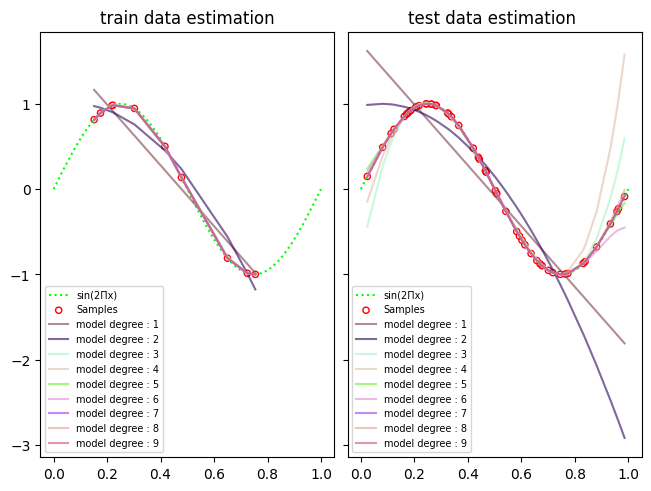

In [256]:
fig = plt.figure(constrained_layout=True)
axd = fig.subplot_mosaic(
    """
    AB
    """
    ,
    sharex = True,
    sharey = True
)

# dataset 1
index = 1

x_tr = info_df['X-tr'].loc[(index,degree)]
y_tr = info_df['Y-tr'].loc[(index,degree)]
yhat_tr = []
x_te = info_df['X-te'].loc[(index,degree)]
y_te = info_df['Y-te'].loc[(index,degree)]
yhat_te = []

for degree in range(1,10):
    yhat_tr.append(info_df['Yhat-tr'].loc[(index,degree)])
    yhat_te.append(info_df['Yhat-te'].loc[(index,degree)])


# x and y are already defined 
# x = np.arange(0,1+0.01,0.01)
# y = np.sin(2*np.pi*x)

_colors = ['#7b4050' , '#2a035d' , '#a9f3c6' ,
          '#dfbeac' , '#66f62b' , '#e28dd5' ,
          '#983ef3' , '#dba393' , '#d24a8d']

# Plot 1

axd['A'].plot(x, y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
axd['A'].scatter(x_tr,y_tr,s=20, facecolors='none', edgecolors='red', label = 'Samples')
axd['A'].set_title('train data estimation')
for degree in range(1,10):
    axd['A'].plot(x_tr,yhat_tr[degree-1], color = _colors[degree-1], linestyle = '-', label = 'model degree : ' + str(degree) ,alpha = 0.6)

axd['A'].legend(loc = 'lower left', prop = {'size': 7})

# Plot 2

axd['B'].plot(x, y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
axd['B'].scatter(x_te,y_te,s=20, facecolors='none', edgecolors='red', label = 'Samples')
axd['B'].set_title('test data estimation ')
for degree in range(1,10):
    axd['B'].plot(x_te,yhat_te[degree-1], color = _colors[degree-1], linestyle = '-', label = 'model degree : ' + str(degree) ,alpha = 0.6)

axd['B'].legend(loc = 'lower left', prop = {'size': 7})


### <font color='blood'> Plot 3 to 6
    
Relation of M, condition number, RMSE and MAE for both train and test datasets

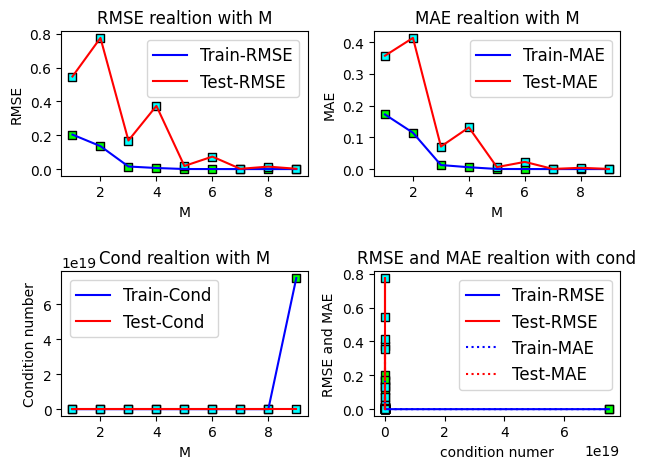

In [257]:
# dataset 1
index = 1


rmse_tr = []
mae_tr  = []
cond_tr = []
rmse_te = []
mae_te  = []
cond_te = []

M = range(1,10)

for degree in M:
    rmse_tr.append(info_df['RMSE-tr'].loc[(index,degree)])
    mae_tr.append(info_df['MAE-tr'].loc[(index,degree)])
    cond_tr.append(info_df['Cond-tr'].loc[(index,degree)])
    
    rmse_te.append(info_df['RMSE-te'].loc[(index,degree)])
    mae_te.append(info_df['MAE-te'].loc[(index,degree)])
    cond_te.append(info_df['Cond-te'].loc[(index,degree)])
    

    
fig, axs = plt.subplots(2, 2, sharex = False, sharey  = False)

# Plot 3
# Relation of M with RMSE for both train and test

axs[0][0].plot(M, rmse_tr,color = 'blue', linestyle = '-' , label = 'Train-RMSE')
axs[0][0].scatter(M, rmse_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[0][0].plot(M, rmse_te,color = 'red', linestyle = '-' , label = 'Test-RMSE')
axs[0][0].scatter(M, rmse_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[0][0].set_xlabel('M')
axs[0][0].set_ylabel('RMSE')
axs[0][0].set_title('RMSE realtion with M')
axs[0][0].legend(loc = 'upper right', prop = {'size': 12})


# Plot 4

axs[0][1].plot(M, mae_tr,color = 'blue', linestyle = '-' , label = 'Train-MAE')
axs[0][1].scatter(M, mae_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[0][1].plot(M, mae_te,color = 'red', linestyle = '-' , label = 'Test-MAE')
axs[0][1].scatter(M, mae_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[0][1].set_xlabel('M')
axs[0][1].set_ylabel('MAE')
axs[0][1].set_title('MAE realtion with M')
axs[0][1].legend(loc = 'upper right', prop = {'size': 12})


# Plot 5

axs[1][0].plot(M, cond_tr,color = 'blue', linestyle = '-' , label = 'Train-Cond')
axs[1][0].scatter(M, cond_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][0].plot(M, cond_te,color = 'red', linestyle = '-' , label = 'Test-Cond')
axs[1][0].scatter(M, cond_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[1][0].set_xlabel('M')
axs[1][0].set_ylabel('Condition number')
axs[1][0].set_title('Cond realtion with M')
axs[1][0].legend(loc = 'upper left', prop = {'size': 12})

# Plot 6

axs[1][1].plot(cond_tr, rmse_tr,color = 'blue', linestyle = '-' , label = 'Train-RMSE')
axs[1][1].scatter(cond_tr, rmse_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][1].plot(cond_te, rmse_te,color = 'red', linestyle = '-' , label = 'Test-RMSE')
axs[1][1].scatter(cond_te, rmse_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')

axs[1][1].plot(cond_tr, mae_tr,color = 'blue', linestyle = ':' , label = 'Train-MAE')
axs[1][1].scatter(cond_tr, mae_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][1].plot(cond_te, mae_te,color = 'red', linestyle = ':' , label = 'Test-MAE')
axs[1][1].scatter(cond_te, mae_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')

axs[1][1].set_xlabel('condition numer')
axs[1][1].set_ylabel('RMSE and MAE')
axs[1][1].set_title('RMSE and MAE realtion with cond')
axs[1][1].legend(loc = 'upper right', prop = {'size': 12})


fig.tight_layout()
plt.show()


### <font color='blood'> Log of changes in M and RMSE/MAE:
    
Keep a separate look at this log. It helps to understand the point of Plot 5 and Plot 6.

In [272]:
cond_rmse_tr = list(zip(cond_tr,rmse_tr))
cond_rmse_te = list(zip(cond_te,rmse_te))
cond_mae_tr = list(zip(cond_tr,mae_tr))
cond_mae_te = list(zip(cond_te,mae_te))

In [264]:
cond_rmse_tr

[(28.419516829888543, 0.20388327672944057),
 (2203.8394205638847, 0.13553146862305473),
 (196578.58762359672, 0.015240523228925018),
 (10412566.976924269, 0.006355406133922812),
 (1365158490.432623, 0.00035598899729621166),
 (88340535643.23598, 0.000154329207613989),
 (8955651606647.611, 6.417479050392184e-06),
 (1185594854440252.2, 3.04535383940387e-08),
 (7.492851605332055e+19, 2.970806208077392e-15)]

In [269]:
cond_rmse_te

[(21.566431531183795, 0.5471900062663955),
 (665.5477258662422, 0.7753896925213685),
 (19554.968295050996, 0.16866636690474227),
 (579188.5695271106, 0.3736799120390359),
 (19314638.256597467, 0.01834656487734099),
 (644607730.3017609, 0.07368643068709411),
 (22469944310.080265, 0.0015753421565915025),
 (793077715966.1959, 0.01457462032075366),
 (29759888244447.895, 0.001751352031573451)]

In [270]:
cond_mae_tr

[(28.419516829888543, 0.17199804504303054),
 (2203.8394205638847, 0.11445074286908241),
 (196578.58762359672, 0.01267411506538077),
 (10412566.976924269, 0.005822449144338099),
 (1365158490.432623, 0.0003085493635374803),
 (88340535643.23598, 0.00013551219691158023),
 (8955651606647.611, 5.477855092750339e-06),
 (1185594854440252.2, 1.4426223443608776e-08),
 (7.492851605332055e+19, 1.6264767310758544e-15)]

In [271]:
cond_mae_te

[(21.566431531183795, 0.3569562775456102),
 (665.5477258662422, 0.413050963353378),
 (19554.968295050996, 0.07095919019316681),
 (579188.5695271106, 0.1311257785648416),
 (19314638.256597467, 0.006247810357144688),
 (644607730.3017609, 0.02263115142178646),
 (22469944310.080265, 0.000447489606617516),
 (793077715966.1959, 0.0040525824392248395),
 (29759888244447.895, 0.0004897898883059931)]

### <font color='blood'> Conclusion:

Model has a very big Condition number at $M = 9$. This causes the other condition number to be ignored in the plot above (hence the vertical line in plot 6). 
    
The lesser the value of RMSE and/or MAE, the better the model. Using dataset 1 as our train data we can see that after $M=7$ almost both MAE and RMSE converge and are very close to 0.0 which is a good sign. Hopefully we didin't have any noise or outliers in our dataset ;therefore, the value of the condition number (for train data) doesnt effect our final result. Bigger condition numbers come with a risk of error in especially computation. 
    
In summary :
    
    
Model performed well. It starts to perform well in $M = 7$ or above. dataset 1 comes from $\sin$ so there is no outlier or noise therefore no issue with bigger condition numbers at higher degrees. Model starts with underfitting (lower $M$s) then fixes itself at higher $M$s and performs well.
    
Based on above : if condition number increases, our model (dataset1) performs better in train data, however it trains well on test data compared to the RMSE of train. for example RMSE of train in $M=9$ is 2.970806208077392e-15 whereas it is 0.001751352031573451 on test data.

## <font color='blood'> Dataset 2
    
Ten random numbers generated in [0,1] and t calculated using $\sin(2\pi x)$
    
### <font color='blood'> Plot 1 and 2
Two plots of 10 lines (9 model's estimate + 1 $\sin$) and  sample's scatter for both train and test datasets 

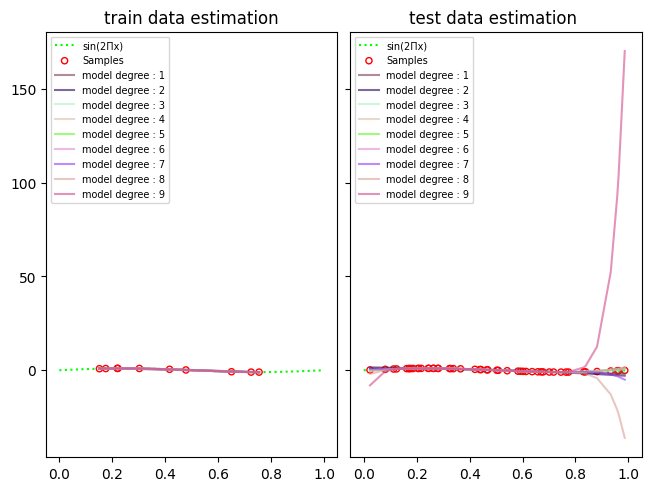

In [273]:
fig = plt.figure(constrained_layout=True)
axd = fig.subplot_mosaic(
    """
    AB
    """
    ,
    sharex = True,
    sharey = True
)

# dataset 2
index = 2

x_tr = info_df['X-tr'].loc[(index,degree)]
y_tr = info_df['Y-tr'].loc[(index,degree)]
yhat_tr = []
x_te = info_df['X-te'].loc[(index,degree)]
y_te = info_df['Y-te'].loc[(index,degree)]
yhat_te = []

for degree in range(1,10):
    yhat_tr.append(info_df['Yhat-tr'].loc[(index,degree)])
    yhat_te.append(info_df['Yhat-te'].loc[(index,degree)])


# x and y are already defined 
# x = np.arange(0,1+0.01,0.01)
# y = np.sin(2*np.pi*x)

_colors = ['#7b4050' , '#2a035d' , '#a9f3c6' ,
          '#dfbeac' , '#66f62b' , '#e28dd5' ,
          '#983ef3' , '#dba393' , '#d24a8d']

# Plot 1

axd['A'].plot(x, y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
axd['A'].scatter(x_tr,y_tr,s=20, facecolors='none', edgecolors='red', label = 'Samples')
axd['A'].set_title('train data estimation')
for degree in range(1,10):
    axd['A'].plot(x_tr,yhat_tr[degree-1], color = _colors[degree-1], linestyle = '-', label = 'model degree : ' + str(degree) ,alpha = 0.6)

axd['A'].legend(loc = 'upper left', prop = {'size': 7})

# Plot 2

axd['B'].plot(x, y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
axd['B'].scatter(x_te,y_te,s=20, facecolors='none', edgecolors='red', label = 'Samples')
axd['B'].set_title('test data estimation ')
for degree in range(1,10):
    axd['B'].plot(x_te,yhat_te[degree-1], color = _colors[degree-1], linestyle = '-', label = 'model degree : ' + str(degree) ,alpha = 0.6)

axd['B'].legend(loc = 'upper left', prop = {'size': 7})


### <font color='blood'> Plot 3 to 6
    
Relation of M, condition number, RMSE and MAE for both train and test datasets

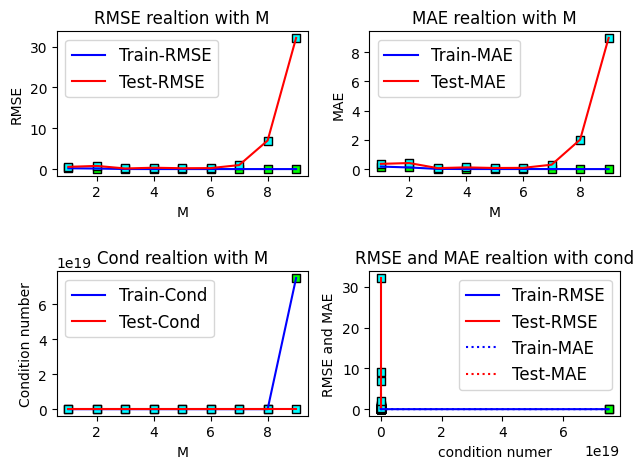

In [274]:
# dataset 2
index = 2



rmse_tr = []
mae_tr  = []
cond_tr = []
rmse_te = []
mae_te  = []
cond_te = []

M = range(1,10)

for degree in M:
    rmse_tr.append(info_df['RMSE-tr'].loc[(index,degree)])
    mae_tr.append(info_df['MAE-tr'].loc[(index,degree)])
    cond_tr.append(info_df['Cond-tr'].loc[(index,degree)])
    
    rmse_te.append(info_df['RMSE-te'].loc[(index,degree)])
    mae_te.append(info_df['MAE-te'].loc[(index,degree)])
    cond_te.append(info_df['Cond-te'].loc[(index,degree)])
    

    
fig, axs = plt.subplots(2, 2, sharex = False, sharey  = False)

# Plot 3
# Relation of M with RMSE for both train and test

axs[0][0].plot(M, rmse_tr,color = 'blue', linestyle = '-' , label = 'Train-RMSE')
axs[0][0].scatter(M, rmse_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[0][0].plot(M, rmse_te,color = 'red', linestyle = '-' , label = 'Test-RMSE')
axs[0][0].scatter(M, rmse_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[0][0].set_xlabel('M')
axs[0][0].set_ylabel('RMSE')
axs[0][0].set_title('RMSE realtion with M')
axs[0][0].legend(loc = 'upper left', prop = {'size': 12})


# Plot 4

axs[0][1].plot(M, mae_tr,color = 'blue', linestyle = '-' , label = 'Train-MAE')
axs[0][1].scatter(M, mae_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[0][1].plot(M, mae_te,color = 'red', linestyle = '-' , label = 'Test-MAE')
axs[0][1].scatter(M, mae_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[0][1].set_xlabel('M')
axs[0][1].set_ylabel('MAE')
axs[0][1].set_title('MAE realtion with M')
axs[0][1].legend(loc = 'upper left', prop = {'size': 12})


# Plot 5

axs[1][0].plot(M, cond_tr,color = 'blue', linestyle = '-' , label = 'Train-Cond')
axs[1][0].scatter(M, cond_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][0].plot(M, cond_te,color = 'red', linestyle = '-' , label = 'Test-Cond')
axs[1][0].scatter(M, cond_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[1][0].set_xlabel('M')
axs[1][0].set_ylabel('Condition number')
axs[1][0].set_title('Cond realtion with M')
axs[1][0].legend(loc = 'upper left', prop = {'size': 12})

# Plot 6

axs[1][1].plot(cond_tr, rmse_tr,color = 'blue', linestyle = '-' , label = 'Train-RMSE')
axs[1][1].scatter(cond_tr, rmse_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][1].plot(cond_te, rmse_te,color = 'red', linestyle = '-' , label = 'Test-RMSE')
axs[1][1].scatter(cond_te, rmse_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')

axs[1][1].plot(cond_tr, mae_tr,color = 'blue', linestyle = ':' , label = 'Train-MAE')
axs[1][1].scatter(cond_tr, mae_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][1].plot(cond_te, mae_te,color = 'red', linestyle = ':' , label = 'Test-MAE')
axs[1][1].scatter(cond_te, mae_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')

axs[1][1].set_xlabel('condition numer')
axs[1][1].set_ylabel('RMSE and MAE')
axs[1][1].set_title('RMSE and MAE realtion with cond')
axs[1][1].legend(loc = 'upper right', prop = {'size': 12})


fig.tight_layout()
plt.show()


### <font color='blood'> Log of changes in M and RMSE/MAE:
    
Keep a separate look at this log. It helps to understand the point of Plot 5 and Plot 6.

In [275]:
cond_rmse_tr = list(zip(cond_tr,rmse_tr))
cond_rmse_te = list(zip(cond_te,rmse_te))
cond_mae_tr = list(zip(cond_tr,mae_tr))
cond_mae_te = list(zip(cond_te,mae_te))

In [276]:
cond_rmse_tr

[(28.419516829888543, 0.20143999995884662),
 (2203.8394205638847, 0.1323659745279379),
 (196578.58762359672, 0.013174574027302769),
 (10412566.976924269, 0.004288503720165243),
 (1365158490.432623, 0.0037859744348487214),
 (88340535643.23598, 0.0037822401958923085),
 (8955651606647.611, 0.0028303296453617423),
 (1185594854440252.2, 9.28750708121998e-05),
 (7.492851605332055e+19, 1.1337681334762112e-11)]

In [277]:
cond_rmse_te

[(21.566431531183795, 0.5483700004537215),
 (665.5477258662422, 0.7757868528540778),
 (19554.968295050996, 0.14993278224394968),
 (579188.5695271106, 0.33134704099951495),
 (19314638.256597467, 0.20850127578392624),
 (644607730.3017609, 0.23996503270381833),
 (22469944310.080265, 0.9776045876056554),
 (793077715966.1959, 6.9961328888607675),
 (29759888244447.895, 32.13821567003487)]

In [278]:
cond_mae_tr

[(28.419516829888543, 0.1709935988035179),
 (2203.8394205638847, 0.11042166745231681),
 (196578.58762359672, 0.01101604563304924),
 (10412566.976924269, 0.0037195807705332567),
 (1365158490.432623, 0.0029785119685131257),
 (88340535643.23598, 0.0030347318560679736),
 (8955651606647.611, 0.0024158271482048826),
 (1185594854440252.2, 4.399608757733875e-05),
 (7.492851605332055e+19, 8.038561483125762e-12)]

In [279]:
cond_mae_te

[(21.566431531183795, 0.35740748552650475),
 (665.5477258662422, 0.41305929594199015),
 (19554.968295050996, 0.06440781265359434),
 (579188.5695271106, 0.11728924093250308),
 (19314638.256597467, 0.07415114562042803),
 (644607730.3017609, 0.0832563142468484),
 (22469944310.080265, 0.2999602780219625),
 (793077715966.1959, 2.0190137627995197),
 (29759888244447.895, 8.98589970347796)]

### <font color='blood'> Conclusion:

In this dataset, we had noise. The estimated function $\hat Y$ is very bad especially at the end of the domain.  The problem occurs because $||.||_2$ is sensetive to noise. That mean small error can cause big differences in the final resul. This doesn't mean that every model created by dataset 2 is bad. In fact, models with lower degree  performed better on this model. model worked well with train data, however in test data it is different. Model starts well with $M = 1$ (Keeping in mind that it is a simple line and we don't expect much from it ), then continues to grow a little worse followed by few good steps until it reaches $M = 7$. In our previous Model (using dataset 1), $M = 7$ or above was our perfect point whereas in this case, from $M = 7$ everything gets worse. 
    
In summary :
    
    
Model starts well, and continue to be well until $M = 7$. after that it gets worse. Condition number analysis is similar to dataset 1. 
Keep in mind that there is still a **HUGE** difference between the values of RMSE and MAE in dataset1 and dataset2 especially when $M$ is too high. The model overfitted for higher $M$s.


## <font color='blood'> Dataset 4
    
Ten random numbers generated in [0,1] and t calculated using $\sin(2\pi x)$
    
### <font color='blood'> Plot 1 and 2
Two plots of 10 lines (9 model's estimate + 1 $\sin$) and  sample's scatter for both train and test datasets 

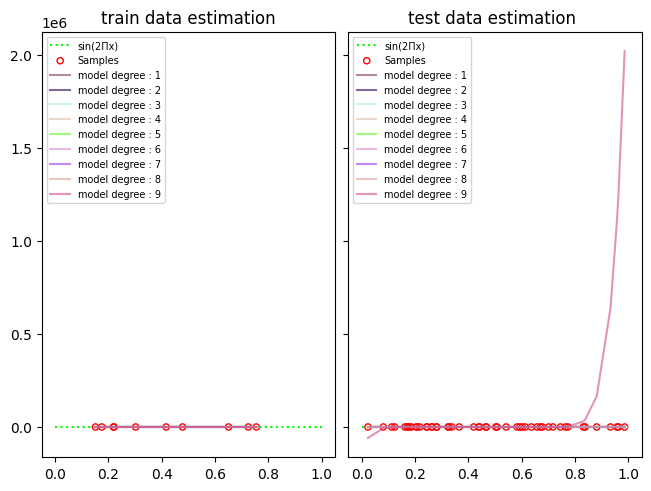

In [281]:
fig = plt.figure(constrained_layout=True)
axd = fig.subplot_mosaic(
    """
    AB
    """
    ,
    sharex = True,
    sharey = True
)

# dataset 4
index = 4

x_tr = info_df['X-tr'].loc[(index,degree)]
y_tr = info_df['Y-tr'].loc[(index,degree)]
yhat_tr = []
x_te = info_df['X-te'].loc[(index,degree)]
y_te = info_df['Y-te'].loc[(index,degree)]
yhat_te = []

for degree in range(1,10):
    yhat_tr.append(info_df['Yhat-tr'].loc[(index,degree)])
    yhat_te.append(info_df['Yhat-te'].loc[(index,degree)])


# x and y are already defined 
# x = np.arange(0,1+0.01,0.01)
# y = np.sin(2*np.pi*x)

_colors = ['#7b4050' , '#2a035d' , '#a9f3c6' ,
          '#dfbeac' , '#66f62b' , '#e28dd5' ,
          '#983ef3' , '#dba393' , '#d24a8d']

# Plot 1

axd['A'].plot(x, y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
axd['A'].scatter(x_tr,y_tr,s=20, facecolors='none', edgecolors='red', label = 'Samples')
axd['A'].set_title('train data estimation')
for degree in range(1,10):
    axd['A'].plot(x_tr,yhat_tr[degree-1], color = _colors[degree-1], linestyle = '-', label = 'model degree : ' + str(degree) ,alpha = 0.6)

axd['A'].legend(loc = 'upper left', prop = {'size': 7})

# Plot 2

axd['B'].plot(x, y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
axd['B'].scatter(x_te,y_te,s=20, facecolors='none', edgecolors='red', label = 'Samples')
axd['B'].set_title('test data estimation ')
for degree in range(1,10):
    axd['B'].plot(x_te,yhat_te[degree-1], color = _colors[degree-1], linestyle = '-', label = 'model degree : ' + str(degree) ,alpha = 0.6)

axd['B'].legend(loc = 'upper left', prop = {'size': 7})


### <font color='blood'> Plot 3 to 6
    
Relation of M, condition number, RMSE and MAE for both train and test datasets

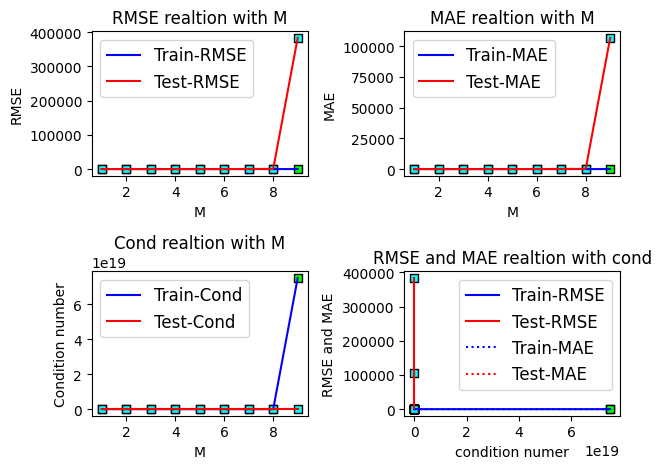

In [282]:
# dataset 4
index = 4


rmse_tr = []
mae_tr  = []
cond_tr = []
rmse_te = []
mae_te  = []
cond_te = []

M = range(1,10)

for degree in M:
    rmse_tr.append(info_df['RMSE-tr'].loc[(index,degree)])
    mae_tr.append(info_df['MAE-tr'].loc[(index,degree)])
    cond_tr.append(info_df['Cond-tr'].loc[(index,degree)])
    
    rmse_te.append(info_df['RMSE-te'].loc[(index,degree)])
    mae_te.append(info_df['MAE-te'].loc[(index,degree)])
    cond_te.append(info_df['Cond-te'].loc[(index,degree)])
    

    
fig, axs = plt.subplots(2, 2, sharex = False, sharey  = False)

# Plot 3
# Relation of M with RMSE for both train and test

axs[0][0].plot(M, rmse_tr,color = 'blue', linestyle = '-' , label = 'Train-RMSE')
axs[0][0].scatter(M, rmse_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[0][0].plot(M, rmse_te,color = 'red', linestyle = '-' , label = 'Test-RMSE')
axs[0][0].scatter(M, rmse_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[0][0].set_xlabel('M')
axs[0][0].set_ylabel('RMSE')
axs[0][0].set_title('RMSE realtion with M')
axs[0][0].legend(loc = 'upper left', prop = {'size': 12})


# Plot 4

axs[0][1].plot(M, mae_tr,color = 'blue', linestyle = '-' , label = 'Train-MAE')
axs[0][1].scatter(M, mae_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[0][1].plot(M, mae_te,color = 'red', linestyle = '-' , label = 'Test-MAE')
axs[0][1].scatter(M, mae_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[0][1].set_xlabel('M')
axs[0][1].set_ylabel('MAE')
axs[0][1].set_title('MAE realtion with M')
axs[0][1].legend(loc = 'upper left', prop = {'size': 12})


# Plot 5

axs[1][0].plot(M, cond_tr,color = 'blue', linestyle = '-' , label = 'Train-Cond')
axs[1][0].scatter(M, cond_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][0].plot(M, cond_te,color = 'red', linestyle = '-' , label = 'Test-Cond')
axs[1][0].scatter(M, cond_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[1][0].set_xlabel('M')
axs[1][0].set_ylabel('Condition number')
axs[1][0].set_title('Cond realtion with M')
axs[1][0].legend(loc = 'upper left', prop = {'size': 12})

# Plot 6

axs[1][1].plot(cond_tr, rmse_tr,color = 'blue', linestyle = '-' , label = 'Train-RMSE')
axs[1][1].scatter(cond_tr, rmse_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][1].plot(cond_te, rmse_te,color = 'red', linestyle = '-' , label = 'Test-RMSE')
axs[1][1].scatter(cond_te, rmse_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')

axs[1][1].plot(cond_tr, mae_tr,color = 'blue', linestyle = ':' , label = 'Train-MAE')
axs[1][1].scatter(cond_tr, mae_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][1].plot(cond_te, mae_te,color = 'red', linestyle = ':' , label = 'Test-MAE')
axs[1][1].scatter(cond_te, mae_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')

axs[1][1].set_xlabel('condition numer')
axs[1][1].set_ylabel('RMSE and MAE')
axs[1][1].set_title('RMSE and MAE realtion with cond')
axs[1][1].legend(loc = 'upper right', prop = {'size': 12})


fig.tight_layout()
plt.show()

### <font color='blood'> Log of changes in M and RMSE/MAE:
    
Keep a separate look at this log. It helps to understand the point of Plot 5 and Plot 6.

In [289]:
cond_rmse_tr = list(zip(cond_tr,rmse_tr))
cond_rmse_te = list(zip(cond_te,rmse_te))
cond_mae_tr = list(zip(cond_tr,mae_tr))
cond_mae_te = list(zip(cond_te,mae_te))

In [290]:
cond_rmse_tr

[(28.419516829888543, 1.695433065661319),
 (2203.8394205638847, 1.5245085614334024),
 (196578.58762359672, 1.5226349202594764),
 (10412566.976924269, 1.3050123430154983),
 (1365158490.432623, 1.161046840409229),
 (88340535643.23598, 1.1467330826910658),
 (8955651606647.611, 0.9148789288207584),
 (1185594854440252.2, 0.9095879960859014),
 (7.492851605332055e+19, 8.021784668228079e-08)]

In [291]:
cond_rmse_te

[(21.566431531183795, 0.43465906305887103),
 (665.5477258662422, 1.8413002511636998),
 (19554.968295050996, 2.2857224983031807),
 (579188.5695271106, 11.217853275556582),
 (19314638.256597467, 26.20376464203552),
 (644607730.3017609, 59.80466655761972),
 (22469944310.080265, 275.4531452270726),
 (793077715966.1959, 482.75661808903527),
 (29759888244447.895, 383527.13960645464)]

In [292]:
cond_mae_tr

[(28.419516829888543, 1.0417179805621148),
 (2203.8394205638847, 1.0946777138273374),
 (196578.58762359672, 1.1008455873944327),
 (10412566.976924269, 0.9978620270025678),
 (1365158490.432623, 0.973354602526497),
 (88340535643.23598, 0.9858921390726805),
 (8955651606647.611, 0.4649099021654548),
 (1185594854440252.2, 0.43088325624899504),
 (7.492851605332055e+19, 5.650219454811367e-08)]

In [293]:
cond_mae_te

[(21.566431531183795, 0.3901635873470386),
 (665.5477258662422, 1.2246247721879702),
 (19554.968295050996, 1.400047889596891),
 (579188.5695271106, 4.722311703608089),
 (19314638.256597467, 9.961660238341459),
 (644607730.3017609, 19.839896798547187),
 (22469944310.080265, 84.62737737085517),
 (793077715966.1959, 140.62447960177545),
 (29759888244447.895, 106819.39752311778)]

### <font color='blood'> Conclusion:

RMSE and MAE total numbers are too high. Why ?  because of the outliers. model tries to fit ever point as its degree increases, therefore it estimates a bad function. Condition numbers are high, the analysis is still similar, that is condition number for train is too big for $M = 9$. As it is obvious from the first two plots, $M=9$ gives the highest RMSE and MAE. 
    
in summary :

The lower the $M$ the better. Once $M$ grows too much, it becomes too sensitive to the outliers, therefore the condition number increases and the estimated function goes wrong in the test. The value of RMSE and MAE is the highest compared to two previously disccused datasets. The model overfitted on higher $M$s.
 


## <font color='blood'> Dataset 5
    
Ten random numbers generated in [0,1] and t calculated using $\sin(2\pi x)$
    
### <font color='blood'> Plot 1 and 2
Two plots of 10 lines (9 model's estimate + 1 $\sin$) and  sample's scatter for both train and test datasets 

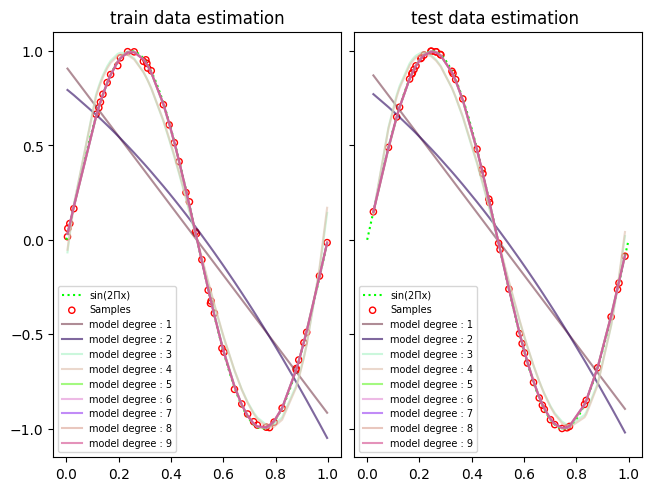

In [294]:
fig = plt.figure(constrained_layout=True)
axd = fig.subplot_mosaic(
    """
    AB
    """
    ,
    sharex = True,
    sharey = True
)

# dataset 5
index = 5

x_tr = info_df['X-tr'].loc[(index,degree)]
y_tr = info_df['Y-tr'].loc[(index,degree)]
yhat_tr = []
x_te = info_df['X-te'].loc[(index,degree)]
y_te = info_df['Y-te'].loc[(index,degree)]
yhat_te = []

for degree in range(1,10):
    yhat_tr.append(info_df['Yhat-tr'].loc[(index,degree)])
    yhat_te.append(info_df['Yhat-te'].loc[(index,degree)])


# x and y are already defined 
# x = np.arange(0,1+0.01,0.01)
# y = np.sin(2*np.pi*x)

_colors = ['#7b4050' , '#2a035d' , '#a9f3c6' ,
          '#dfbeac' , '#66f62b' , '#e28dd5' ,
          '#983ef3' , '#dba393' , '#d24a8d']

# Plot 1

axd['A'].plot(x, y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
axd['A'].scatter(x_tr,y_tr,s=20, facecolors='none', edgecolors='red', label = 'Samples')
axd['A'].set_title('train data estimation')
for degree in range(1,10):
    axd['A'].plot(x_tr,yhat_tr[degree-1], color = _colors[degree-1], linestyle = '-', label = 'model degree : ' + str(degree) ,alpha = 0.6)

axd['A'].legend(loc = 'lower left', prop = {'size': 7})

# Plot 2

axd['B'].plot(x, y, color = 'lime', linestyle = ':', label = 'sin(2Πx)')
axd['B'].scatter(x_te,y_te,s=20, facecolors='none', edgecolors='red', label = 'Samples')
axd['B'].set_title('test data estimation ')
for degree in range(1,10):
    axd['B'].plot(x_te,yhat_te[degree-1], color = _colors[degree-1], linestyle = '-', label = 'model degree : ' + str(degree) ,alpha = 0.6)

axd['B'].legend(loc = 'lower left', prop = {'size': 7})


### <font color='blood'> Plot 3 to 6
    
Relation of M, condition number, RMSE and MAE for both train and test datasets

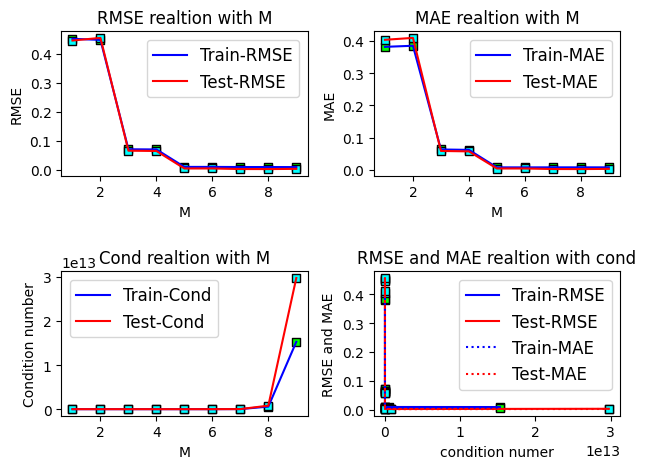

In [295]:
# dataset 5
index = 5


rmse_tr = []
mae_tr  = []
cond_tr = []
rmse_te = []
mae_te  = []
cond_te = []

M = range(1,10)

for degree in M:
    rmse_tr.append(info_df['RMSE-tr'].loc[(index,degree)])
    mae_tr.append(info_df['MAE-tr'].loc[(index,degree)])
    cond_tr.append(info_df['Cond-tr'].loc[(index,degree)])
    
    rmse_te.append(info_df['RMSE-te'].loc[(index,degree)])
    mae_te.append(info_df['MAE-te'].loc[(index,degree)])
    cond_te.append(info_df['Cond-te'].loc[(index,degree)])
    

    
fig, axs = plt.subplots(2, 2, sharex = False, sharey  = False)

# Plot 3
# Relation of M with RMSE for both train and test

axs[0][0].plot(M, rmse_tr,color = 'blue', linestyle = '-' , label = 'Train-RMSE')
axs[0][0].scatter(M, rmse_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[0][0].plot(M, rmse_te,color = 'red', linestyle = '-' , label = 'Test-RMSE')
axs[0][0].scatter(M, rmse_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[0][0].set_xlabel('M')
axs[0][0].set_ylabel('RMSE')
axs[0][0].set_title('RMSE realtion with M')
axs[0][0].legend(loc = 'upper right', prop = {'size': 12})


# Plot 4

axs[0][1].plot(M, mae_tr,color = 'blue', linestyle = '-' , label = 'Train-MAE')
axs[0][1].scatter(M, mae_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[0][1].plot(M, mae_te,color = 'red', linestyle = '-' , label = 'Test-MAE')
axs[0][1].scatter(M, mae_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[0][1].set_xlabel('M')
axs[0][1].set_ylabel('MAE')
axs[0][1].set_title('MAE realtion with M')
axs[0][1].legend(loc = 'upper right', prop = {'size': 12})


# Plot 5

axs[1][0].plot(M, cond_tr,color = 'blue', linestyle = '-' , label = 'Train-Cond')
axs[1][0].scatter(M, cond_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][0].plot(M, cond_te,color = 'red', linestyle = '-' , label = 'Test-Cond')
axs[1][0].scatter(M, cond_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')
axs[1][0].set_xlabel('M')
axs[1][0].set_ylabel('Condition number')
axs[1][0].set_title('Cond realtion with M')
axs[1][0].legend(loc = 'upper left', prop = {'size': 12})

# Plot 6

axs[1][1].plot(cond_tr, rmse_tr,color = 'blue', linestyle = '-' , label = 'Train-RMSE')
axs[1][1].scatter(cond_tr, rmse_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][1].plot(cond_te, rmse_te,color = 'red', linestyle = '-' , label = 'Test-RMSE')
axs[1][1].scatter(cond_te, rmse_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')

axs[1][1].plot(cond_tr, mae_tr,color = 'blue', linestyle = ':' , label = 'Train-MAE')
axs[1][1].scatter(cond_tr, mae_tr,s=40,marker = 's', color = 'lime' ,edgecolors= 'black')
axs[1][1].plot(cond_te, mae_te,color = 'red', linestyle = ':' , label = 'Test-MAE')
axs[1][1].scatter(cond_te, mae_te,s=40,marker = 's', color = 'aqua' ,edgecolors= 'black')

axs[1][1].set_xlabel('condition numer')
axs[1][1].set_ylabel('RMSE and MAE')
axs[1][1].set_title('RMSE and MAE realtion with cond')
axs[1][1].legend(loc = 'upper right', prop = {'size': 12})


fig.tight_layout()
plt.show()

### <font color='blood'> Log of changes in M and RMSE/MAE:
    
Keep a separate look at this log. It helps to understand the point of Plot 5 and Plot 6.

In [296]:
cond_rmse_tr = list(zip(cond_tr,rmse_tr))
cond_rmse_te = list(zip(cond_te,rmse_te))
cond_mae_tr = list(zip(cond_tr,mae_tr))
cond_mae_te = list(zip(cond_te,mae_te))

In [297]:
cond_rmse_tr

[(19.083713740377238, 0.4522895734903553),
 (463.7191006310207, 0.448647377125084),
 (12758.467575708935, 0.07127695787812893),
 (339875.9245405969, 0.07068593747320408),
 (11385242.545547703, 0.010465964040415795),
 (406457371.332772, 0.010447389246887234),
 (18616262918.970398, 0.010013316615915077),
 (579023294819.2592, 0.01000099899688622),
 (15275539416869.273, 0.00980901194170743)]

In [298]:
cond_rmse_te

[(21.566431531183795, 0.4464483684772053),
 (665.5477258662422, 0.45548825059698556),
 (19554.968295050996, 0.06639467770116371),
 (579188.5695271106, 0.0653789847969415),
 (19314638.256597467, 0.005018556009145303),
 (644607730.3017609, 0.0050438002777939955),
 (22469944310.080265, 0.003086695031034249),
 (793077715966.1959, 0.002959830939545543),
 (29759888244447.895, 0.003729300763825065)]

In [299]:
cond_mae_tr

[(19.083713740377238, 0.38109722807191126),
 (463.7191006310207, 0.38446317910354016),
 (12758.467575708935, 0.06320719219106623),
 (339875.9245405969, 0.06196304425549006),
 (11385242.545547703, 0.007752026931511808),
 (406457371.332772, 0.007708361631069147),
 (18616262918.970398, 0.007814967394126418),
 (579023294819.2592, 0.007837450459739319),
 (15275539416869.273, 0.007774857011334315)]

In [300]:
cond_mae_te

[(21.566431531183795, 0.4029521370313003),
 (665.5477258662422, 0.4088206486961246),
 (19554.968295050996, 0.05859362096579732),
 (579188.5695271106, 0.057292109311329574),
 (19314638.256597467, 0.004219265375670628),
 (644607730.3017609, 0.00426241633716828),
 (22469944310.080265, 0.0026269508573528743),
 (793077715966.1959, 0.0024610362977340906),
 (29759888244447.895, 0.0030440949979460286)]

### <font color='blood'> Conclusion:

Model perferoms well even though the dataset contains noisy data.  Model starts bad then suddenly (after $M = 3$) gets very much better and then it keeps getting better. The condition number for both train and test goes up especially after $M = 9$.
    
In summary :
    
    
Models starts with underfitting, then becomes better at $M = 3$. Almost after $M = 6$, models start to perform well. Even though dataset was noisy, the number of samples tried to nullify that effect. In this case even though condition number is high, the difference between RMSE of train and RMSE of test is small.   